In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
class airbnb_city:
    
    def __init__(self, csv):
        
        self.csv = csv
                
        self.df_city = pd.read_csv(self.csv)
        
        print("Instance created!")
        
    def clean_columns(self):
        
        # Take only the relevant columns in the dataframe
        
        l_relevant_columns = ["host_is_superhost","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type","room_type","accommodates","bathrooms_text","beds","price","minimum_nights","maximum_nights","availability_30","availability_365","number_of_reviews","instant_bookable", "amenities", "host_verifications"]

        self.df_city = self.df_city[l_relevant_columns]
        
        self.df_city["bathrooms_text"].replace(np.nan, "?", inplace = True)
        
        # Get numbers out of bathroom_text columns
        
        l_nums = [re.findall(r'\d+',i) for i in self.df_city["bathrooms_text"].values]

        l_nums_completed = []

        for i in l_nums:

            if len(i) > 1:

                l_nums_completed.append('.'.join(i))

            elif len(i) == 0:

                l_nums_completed.append('0')

            else:

                l_nums_completed.append(i[0])

        # Separate categories from bathroom_text
        
        l_category = []

        for i in self.df_city["bathrooms_text"].values:

            if "shared" in i:

                l_category.append("Shared")

            elif "private" in i:

                l_category.append("Private")

            else:

                l_category.append("Unknown")
                
        # Create two different columns replacing bathroom_text
        
        self.df_city.drop("bathrooms_text", axis = 1, inplace = True)
                
        self.df_city["num_of_baths"] = l_nums_completed
        
        self.df_city["bath_category"] = l_category
        
        self.df_city["num_of_baths"] = self.df_city["num_of_baths"].astype("float64")

        # Column["prices"]
        
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)
        
        self.df_city["amenities"] = [len(i) for i in self.df_city["amenities"]]

        self.df_city["host_verifications"] = [len(i) for i in self.df_city["host_verifications"]]
        
        
        print("Dataframe sucessfully created!")
    
    def label_encoding(self):
        
        self.df_city.dropna(inplace=True)
        
        # Encoding columns with dummies function
        
        def dummies(data, column):
            return pd.get_dummies(data = data[column], drop_first=True)
        
        self.df_city["host_is_superhost"] = dummies(self.df_city, "host_is_superhost")
        self.df_city["instant_bookable"] = dummies(self.df_city, "instant_bookable")
        
        df_room_type = dummies(self.df_city, "room_type")
        df_bath_category = dummies(self.df_city, "bath_category")
        df_bath_category = df_bath_category.rename(columns={'Shared': 'shared_bath', 'Unknown': 'unknoun_bath'})
        
        self.df_city = pd.concat([self.df_city, df_bath_category], axis = 1)

        self.df_city = pd.concat([self.df_city, df_room_type], axis = 1)

        self.df_city.drop("room_type", axis = 1, inplace = True)

        self.df_city.drop("bath_category", axis = 1, inplace = True)
        
        # Encoding categorical columns with labelEncoding function
        
        l_columns_to_labelEncode = ["neighbourhood_cleansed", "property_type", "neighbourhood_group_cleansed"]
        l_columns_encoded = list()

        for i in l_columns_to_labelEncode:

            # Inicializing object LabelEncoder()
            o_labelEncoding = LabelEncoder()

            # Training it with the column data
            o_labelEncoding.fit(self.df_city[i].values)

            # Transform the column
            l_columns_encoded.append(o_labelEncoding.transform(self.df_city[i].values))

        self.df_city["neighbourhood_cleansed"] = l_columns_encoded[0]
        self.df_city["property_type"] = l_columns_encoded[1]
        self.df_city["neighbourhood_group_cleansed"] = l_columns_encoded[2]
        
        print("Dataframe sucessfully encoded!")

        
    def return_df(self):
    
        return self.df_city
    
    def display_df(self):
    
        display(self.df_city)

In [66]:
madrid = airbnb_city("C:\\Users\\ignci\\OneDrive\\Escritorio\\Curso\\Coisigna\\dsb-p2-ml\\ipynbs\datasets\\Madrid air bnb\\listings_detailed.csv")

Instance created!


In [4]:
madrid.clean_columns()

Dataframe sucessfully created!


In [5]:
madrid.label_encoding()

Dataframe sucessfully encoded!


In [6]:
madrid.display_df()

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,...,number_of_reviews,instant_bookable,amenities,host_verifications,num_of_baths,shared_bath,unknoun_bath,Hotel room,Private room,Shared room
0,1,60,4,23,2,1.0,60.0,1,1125,30,...,78,0,272,80,1.0,1,0,0,1,0
1,0,44,9,23,1,1.0,31.0,4,40,29,...,33,0,444,98,1.0,0,1,0,1,0
2,0,67,0,4,6,5.0,50.0,15,730,1,...,0,0,631,109,2.0,0,1,0,0,0
3,0,117,3,4,3,1.0,92.0,5,730,12,...,10,1,460,18,1.0,0,1,0,0,0
4,0,67,0,38,1,1.0,26.0,2,1125,30,...,149,0,215,55,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,0,98,9,4,2,2.0,40.0,30,1125,30,...,0,1,152,18,1.0,0,1,0,0,0
19613,0,50,3,23,1,1.0,23.0,30,1125,14,...,0,0,229,98,2.0,1,0,0,1,0
19614,0,56,5,23,1,1.0,21.0,30,1125,15,...,0,0,136,98,3.5,1,0,0,1,0
19615,0,13,5,23,1,1.0,22.0,7,1125,29,...,0,0,327,98,3.0,0,1,0,1,0


In [7]:
df = madrid.return_df()

# Outliers

host_is_superhost


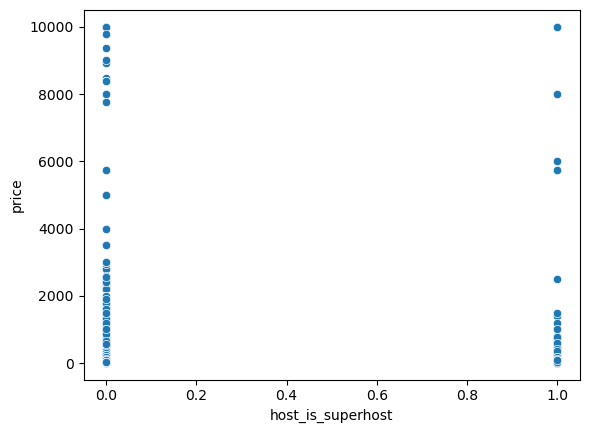

neighbourhood_cleansed


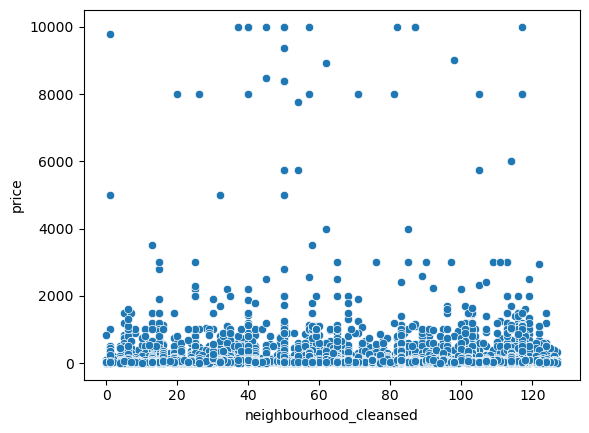

neighbourhood_group_cleansed


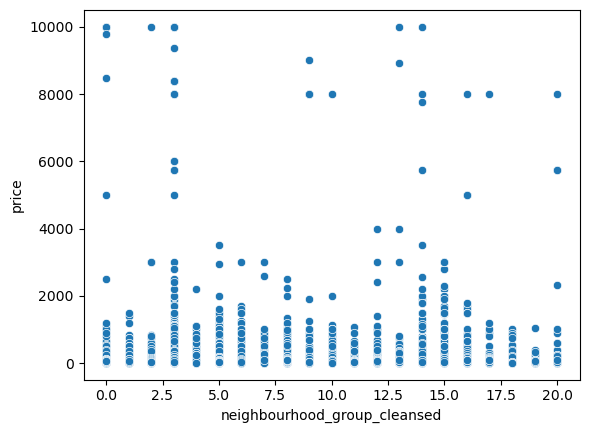

property_type


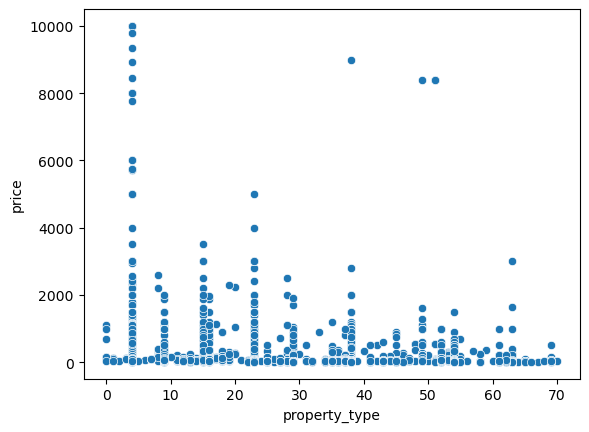

accommodates


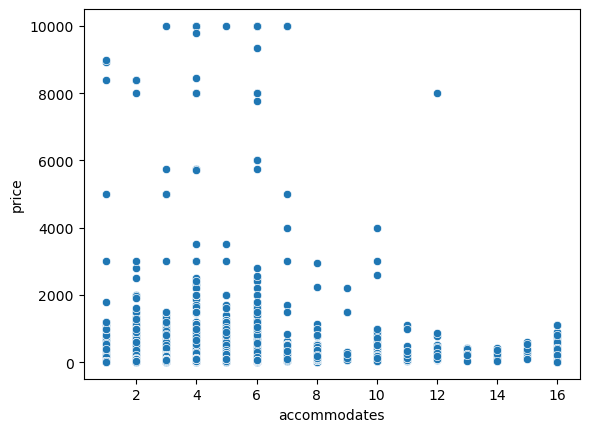

beds


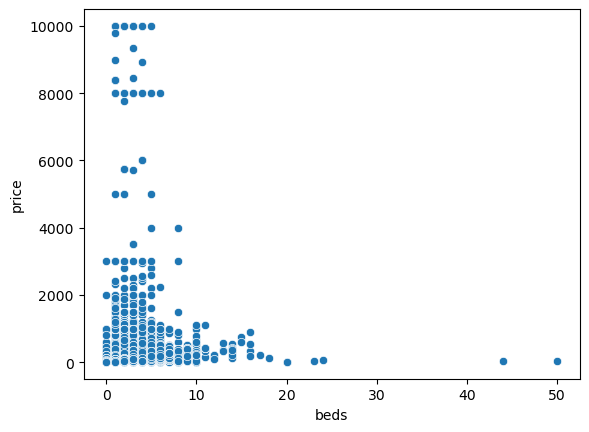

price


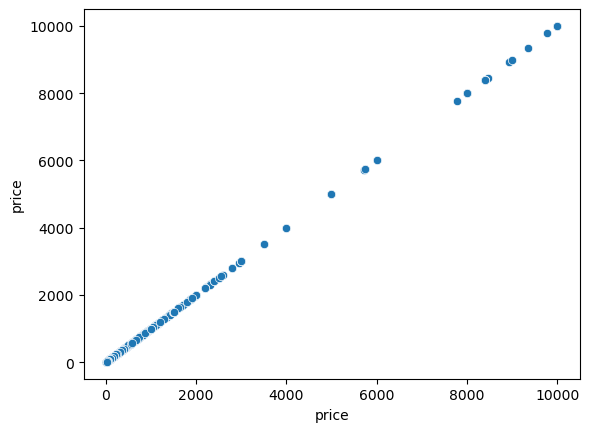

minimum_nights


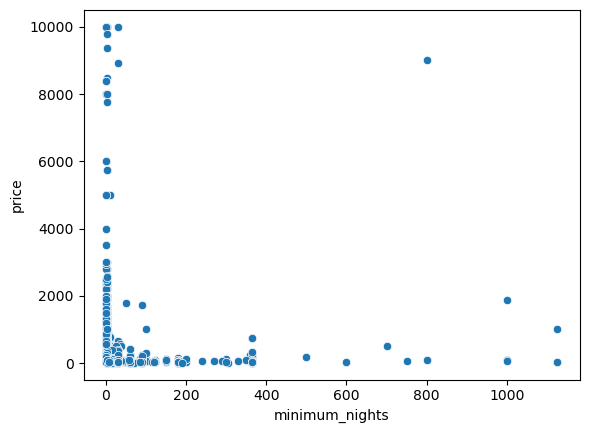

maximum_nights


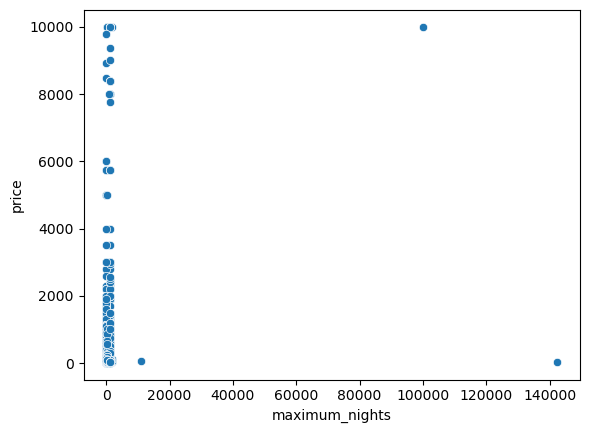

availability_30


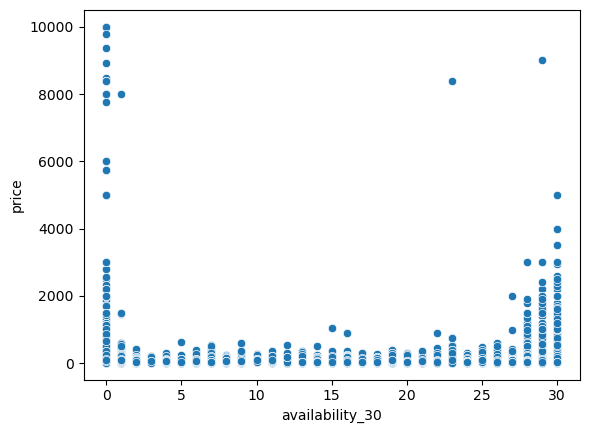

availability_365


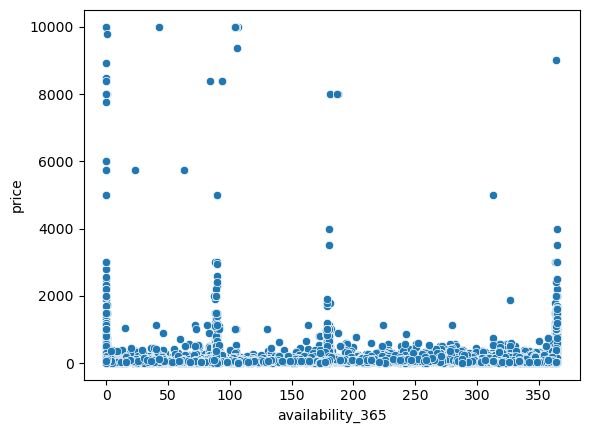

number_of_reviews


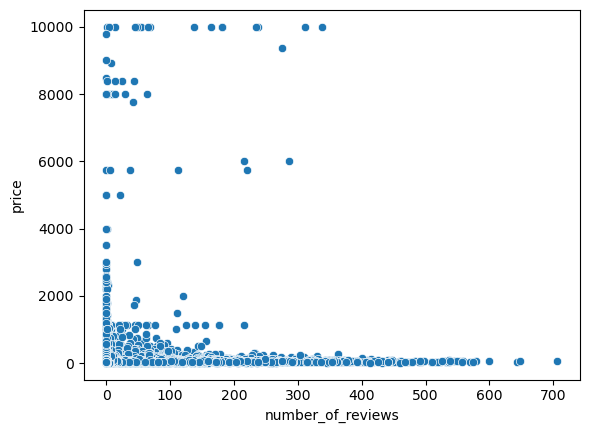

instant_bookable


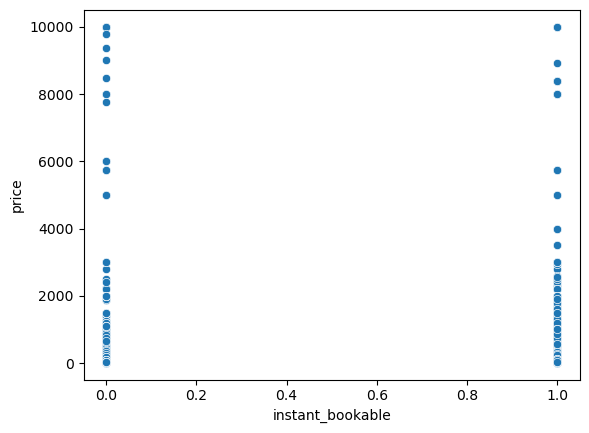

amenities


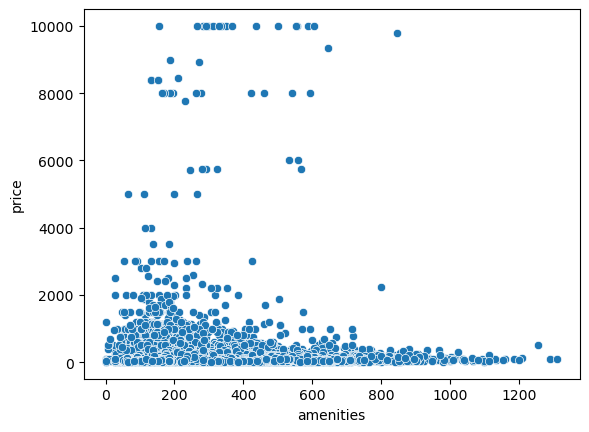

host_verifications


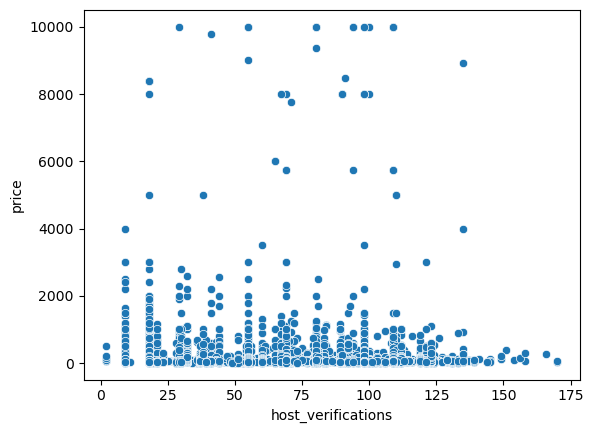

num_of_baths


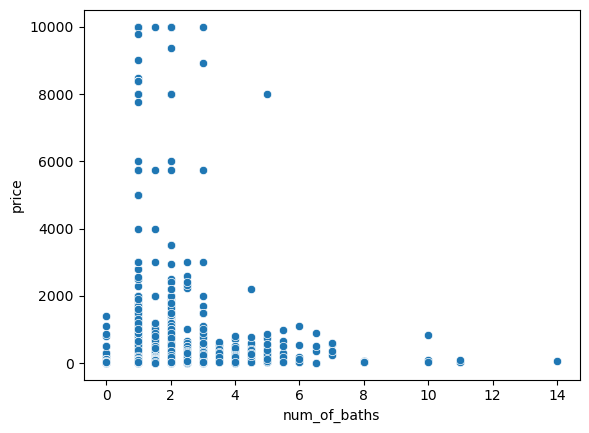

shared_bath


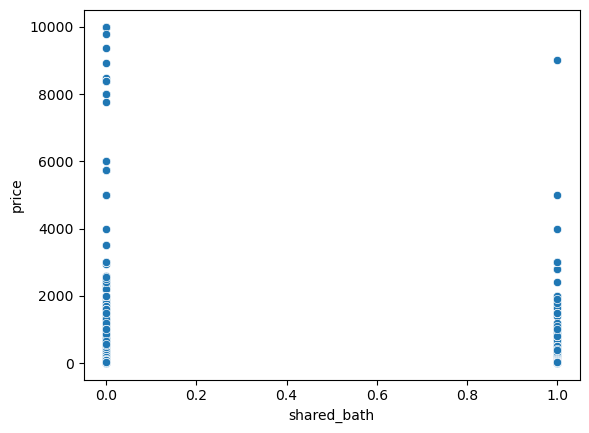

unknoun_bath


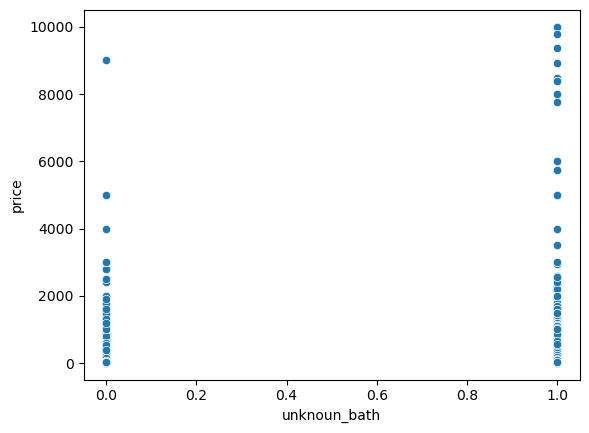

Hotel room


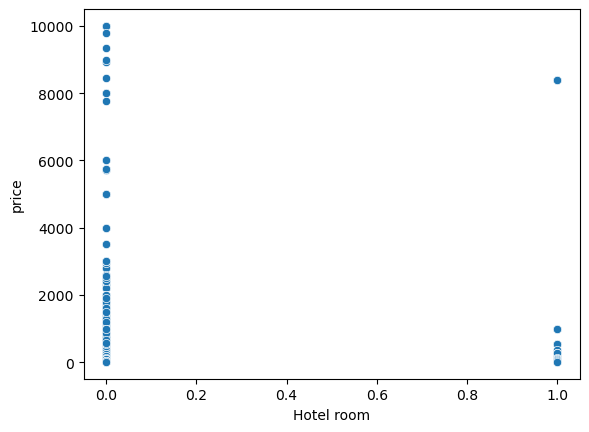

Private room


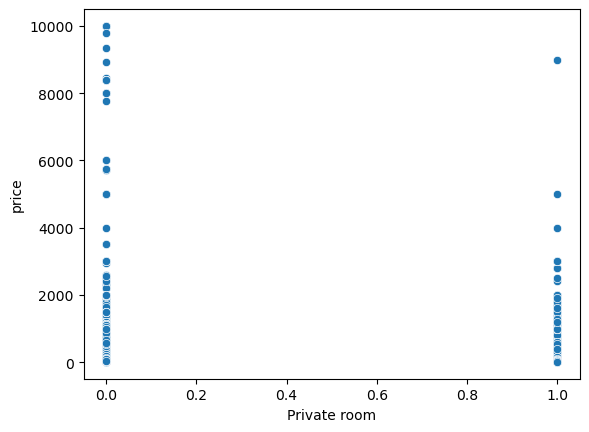

Shared room


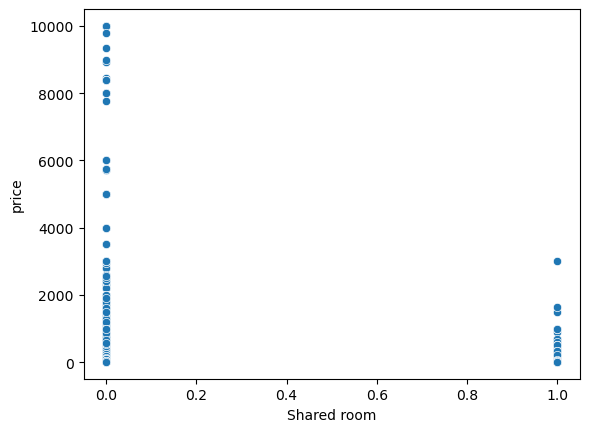

In [8]:
for i in df.columns:
    print(i)
    sns.scatterplot(x= df[i], y = df["price"])
    plt.show()

host_is_superhost


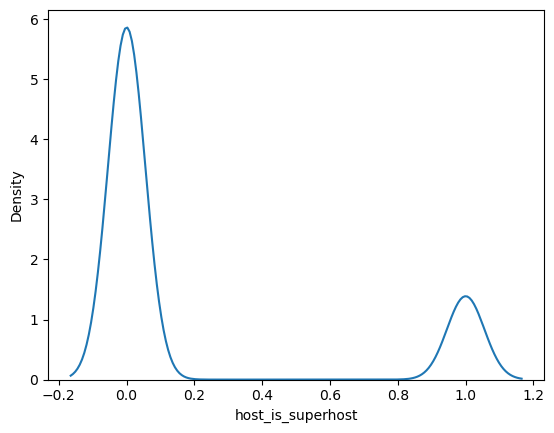

neighbourhood_cleansed


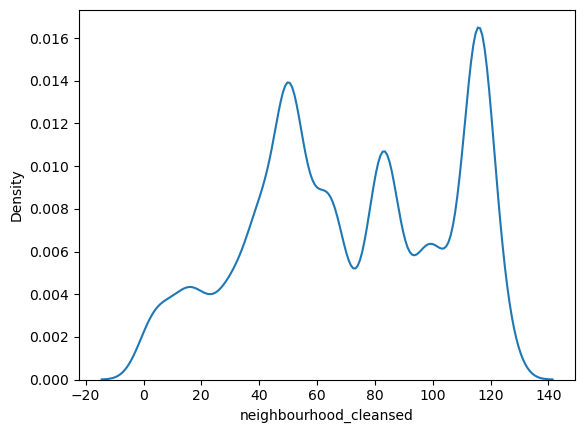

neighbourhood_group_cleansed


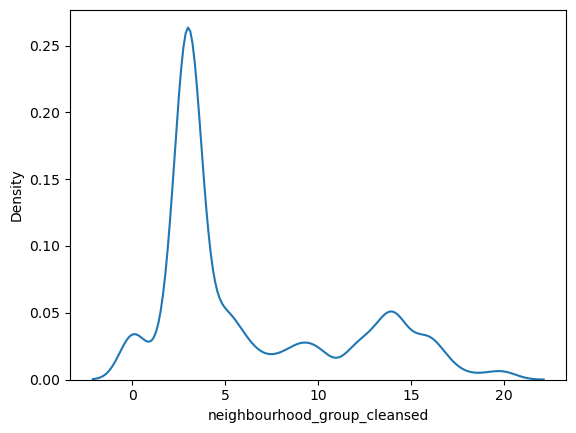

property_type


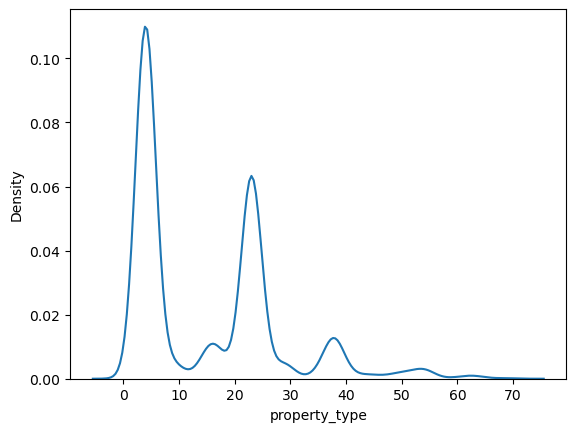

accommodates


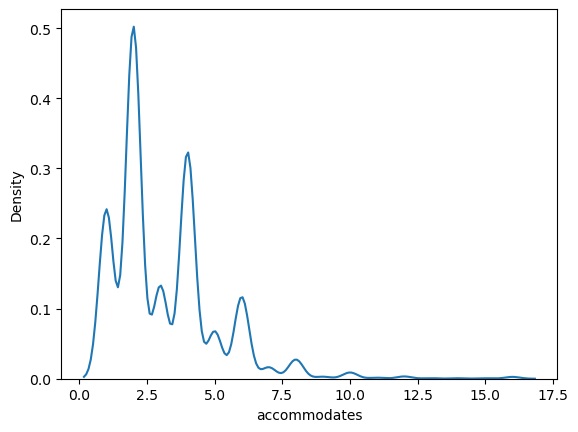

beds


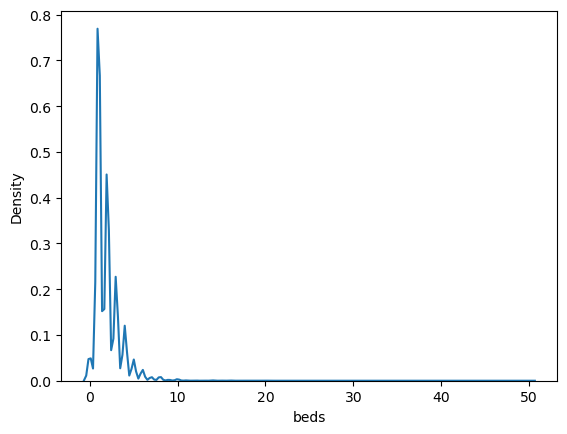

price


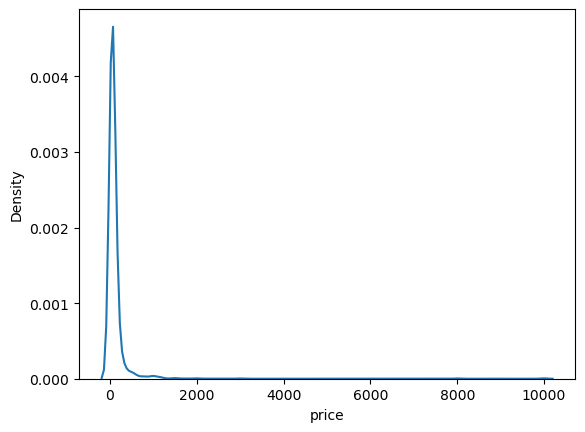

minimum_nights


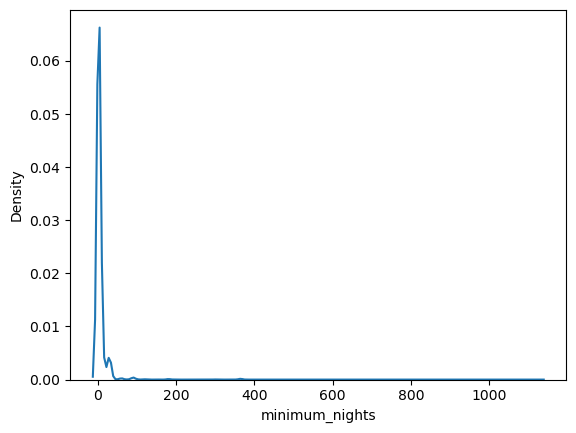

maximum_nights


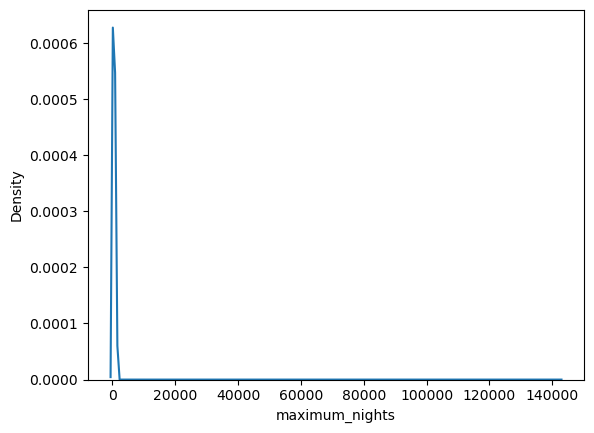

availability_30


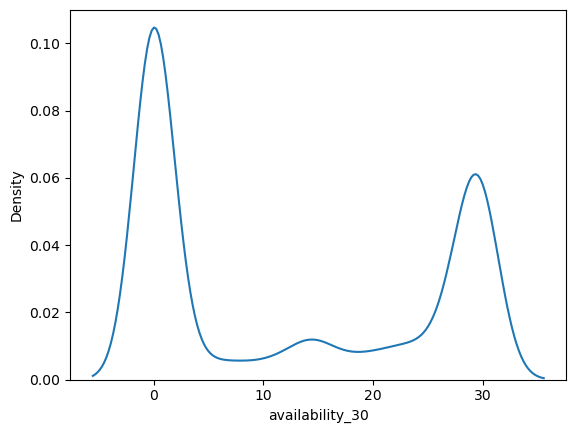

availability_365


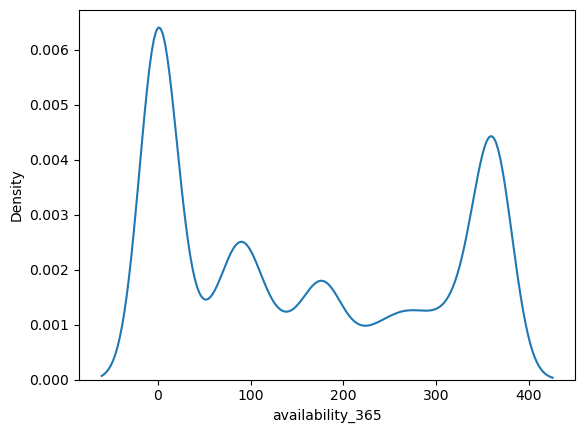

number_of_reviews


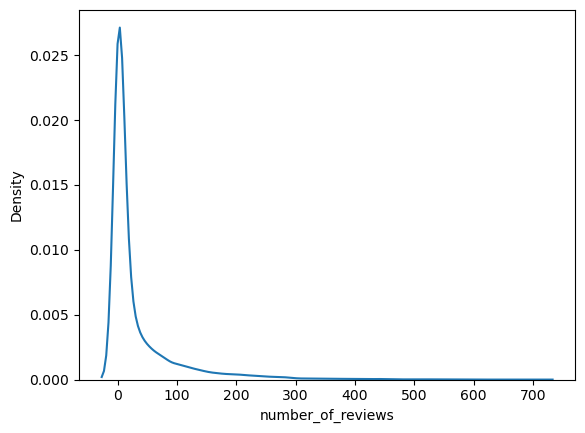

instant_bookable


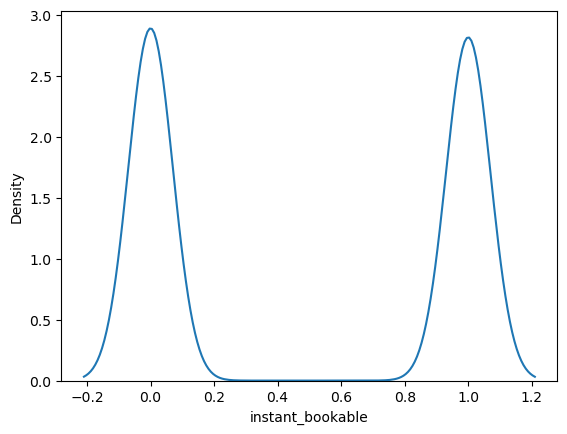

amenities


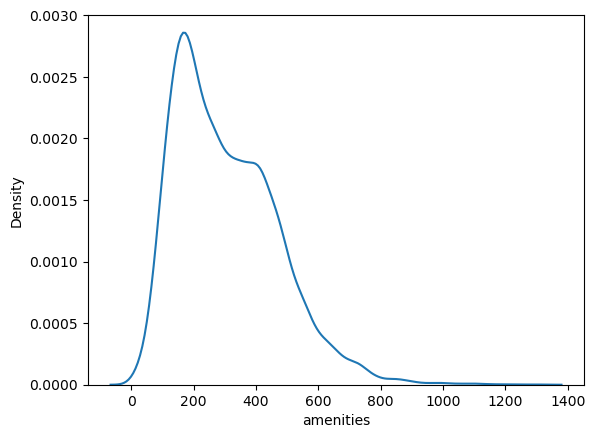

host_verifications


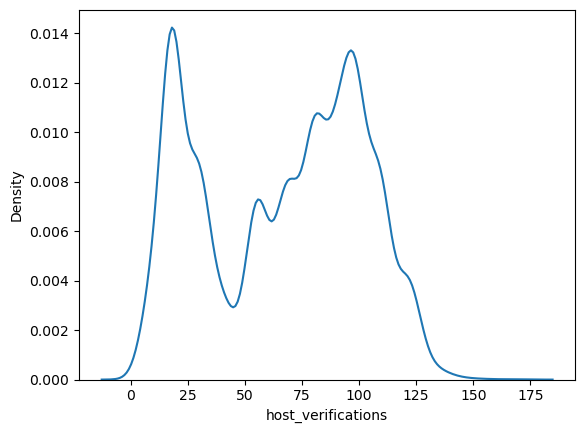

num_of_baths


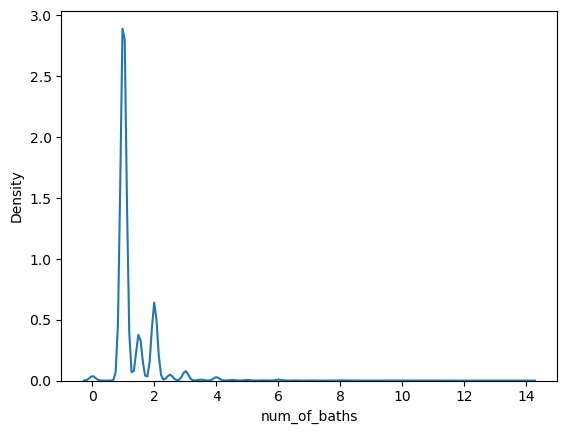

shared_bath


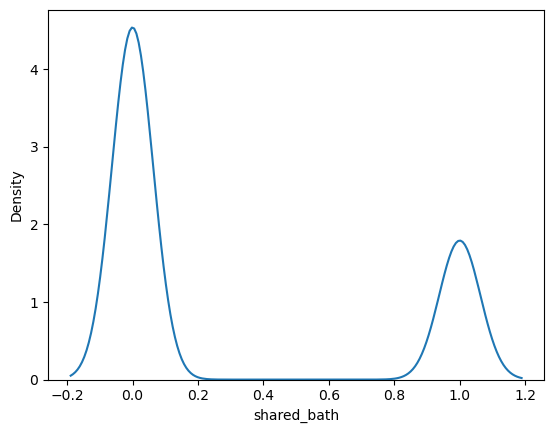

unknoun_bath


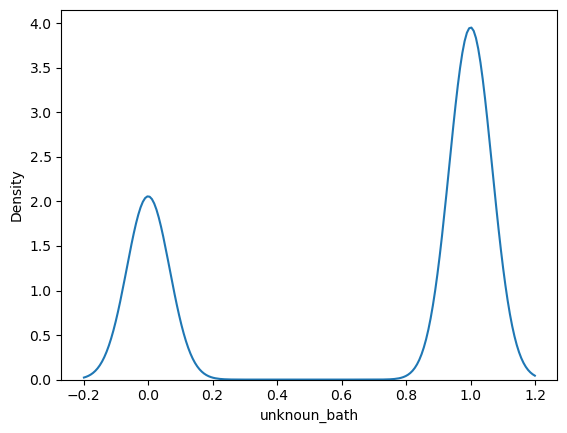

Hotel room


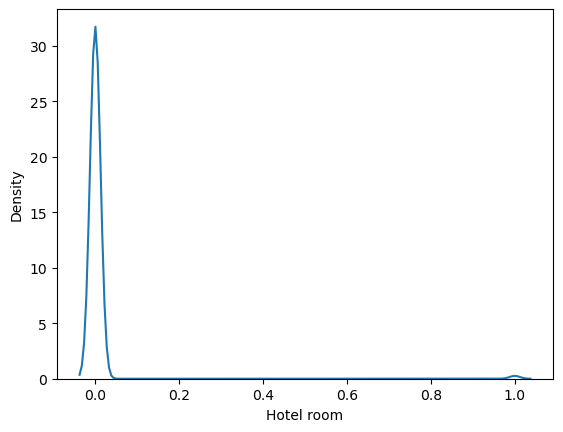

Private room


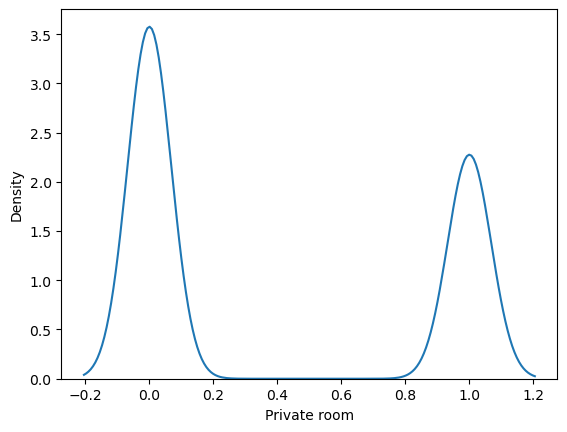

Shared room


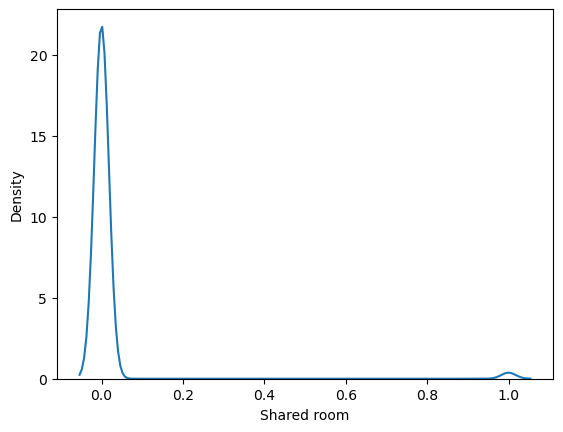

In [9]:
for i in df.columns:
    
    print(i)
    sns.kdeplot(df[i])
    plt.show()

In [10]:
df.shape

(18700, 21)

In [11]:
df = df[df["beds"]<15]

In [12]:
df.shape

(18686, 21)

In [13]:
df = df[df["accommodates"]<13]

In [14]:
df.shape

(18637, 21)

In [15]:
df = df[df["price"]<700]

In [16]:
df.shape

(18196, 21)

In [17]:
df = df[df["minimum_nights"]<150]

In [18]:
df.shape

(18110, 21)

In [19]:
df = df[df["maximum_nights"]<1500]

In [20]:
df.shape

(18105, 21)

In [21]:
df = df[df["number_of_reviews"]<500]

In [22]:
df.shape

(18082, 21)

In [23]:
df = df[df["amenities"]<1200]

In [24]:
df.shape

(18078, 21)

In [25]:
df = df[df["host_verifications"]<160]

In [26]:
df.shape

(18075, 21)

In [27]:
df = df[df["num_of_baths"] < 7]

In [28]:
df.shape

(18060, 21)

host_is_superhost


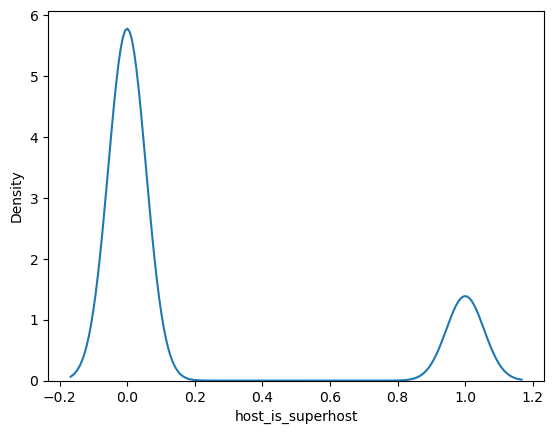

neighbourhood_cleansed


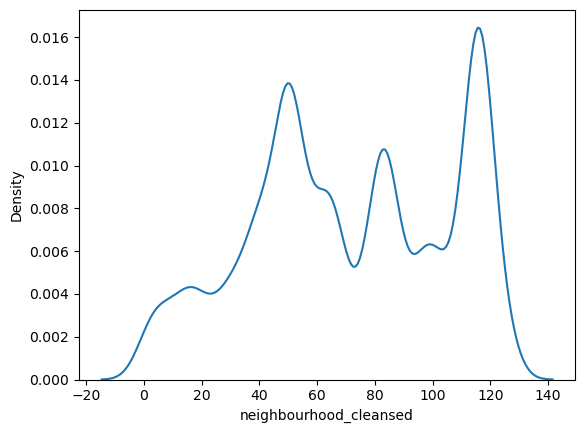

neighbourhood_group_cleansed


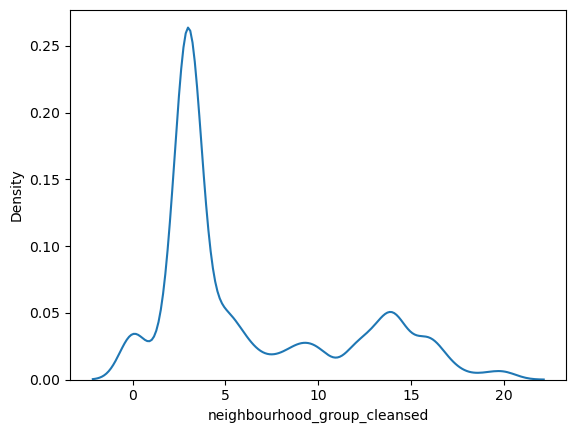

property_type


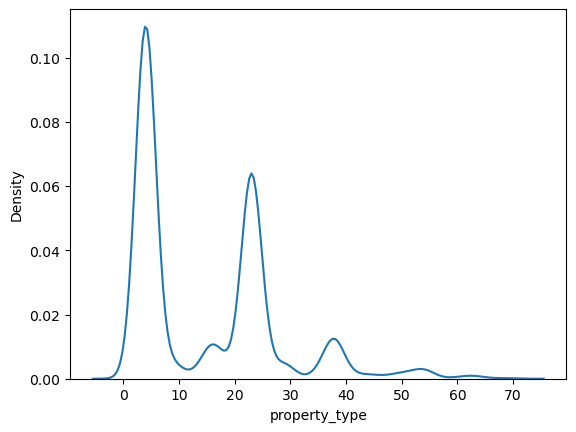

accommodates


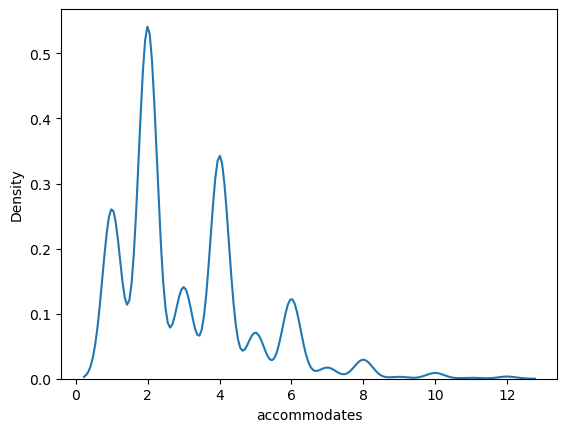

beds


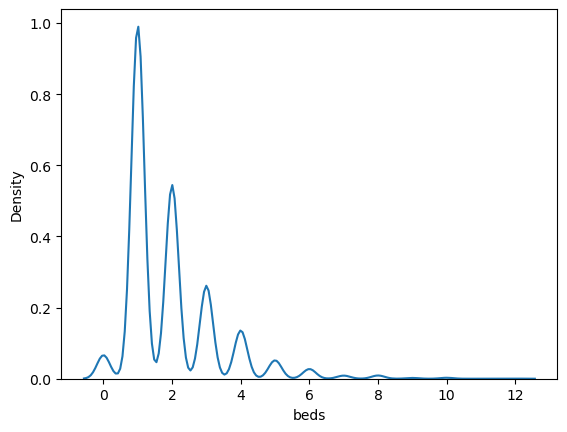

price


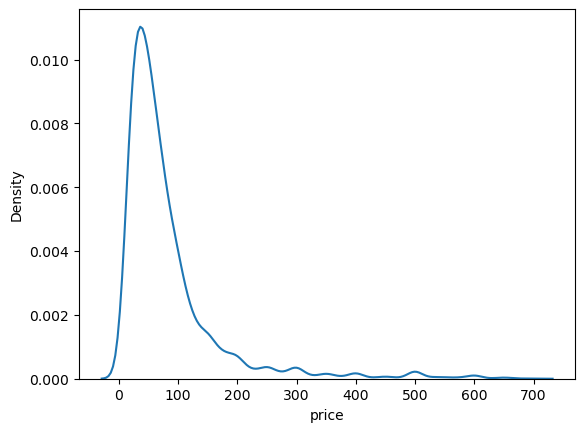

minimum_nights


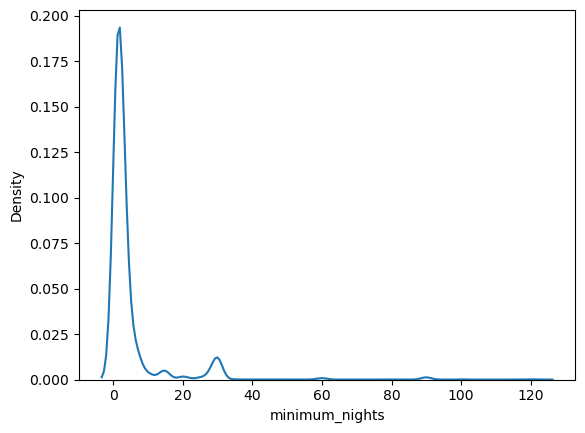

maximum_nights


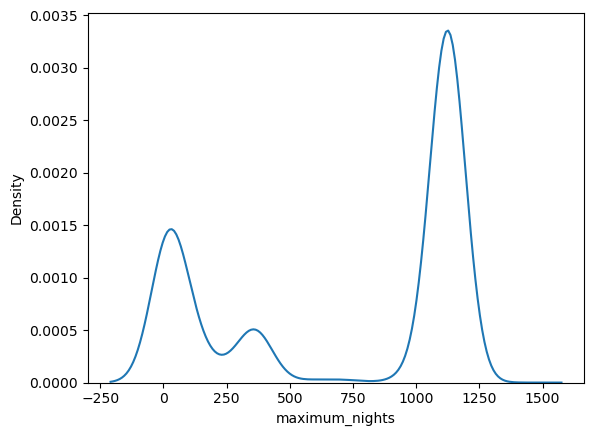

availability_30


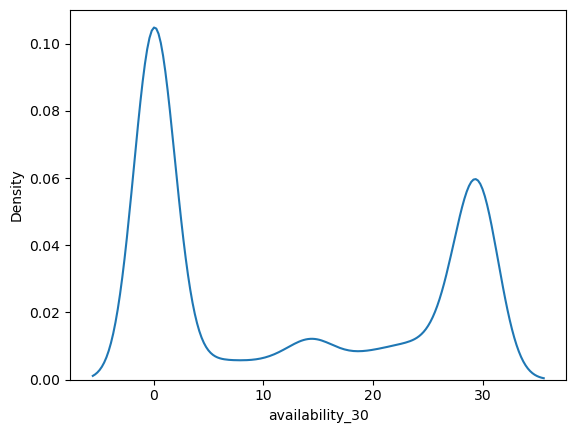

availability_365


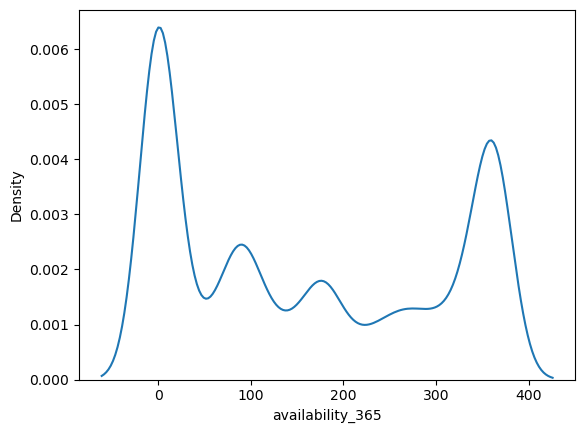

number_of_reviews


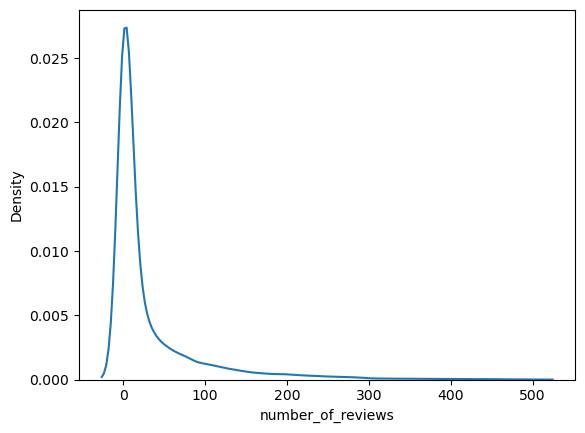

instant_bookable


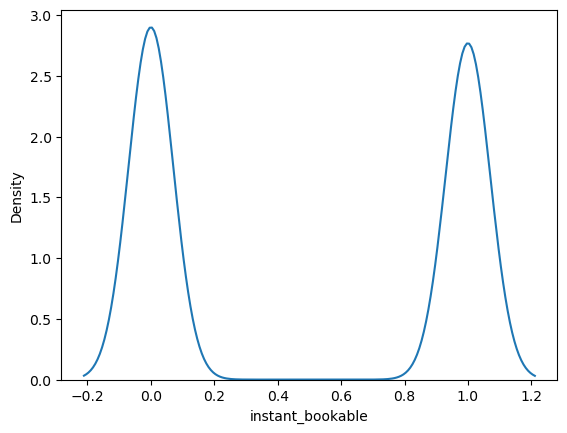

amenities


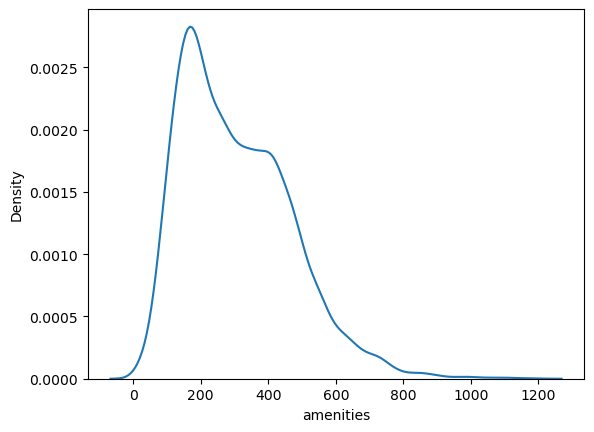

host_verifications


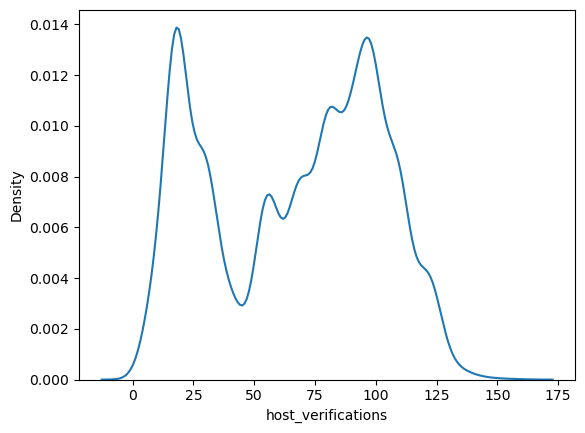

num_of_baths


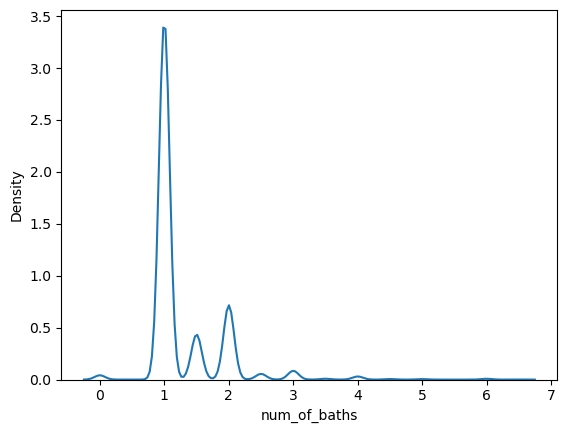

shared_bath


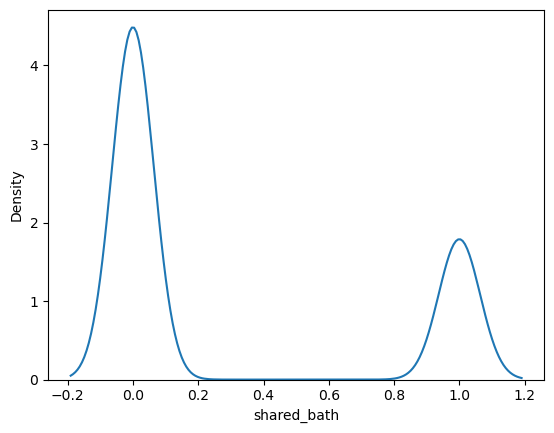

unknoun_bath


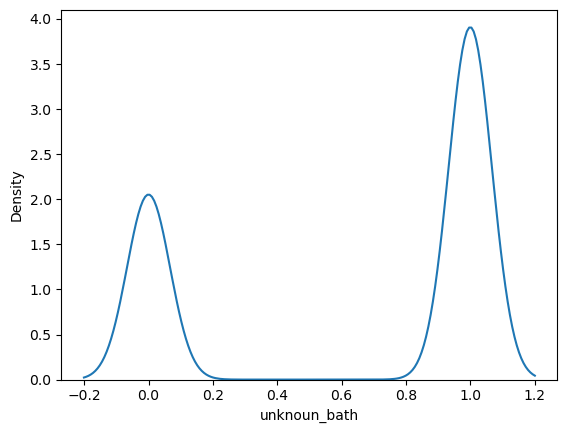

Hotel room


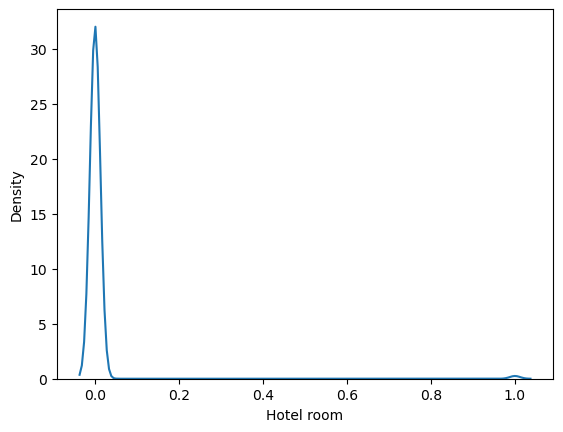

Private room


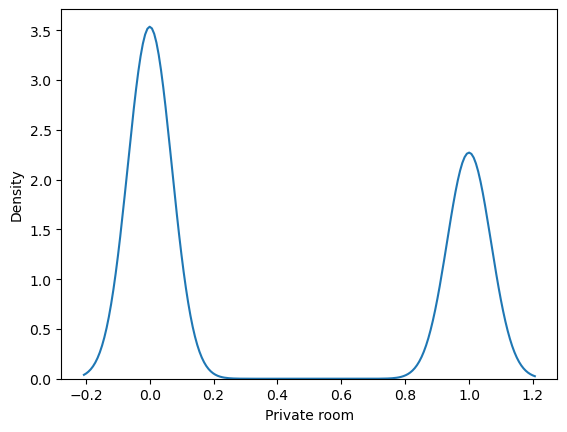

Shared room


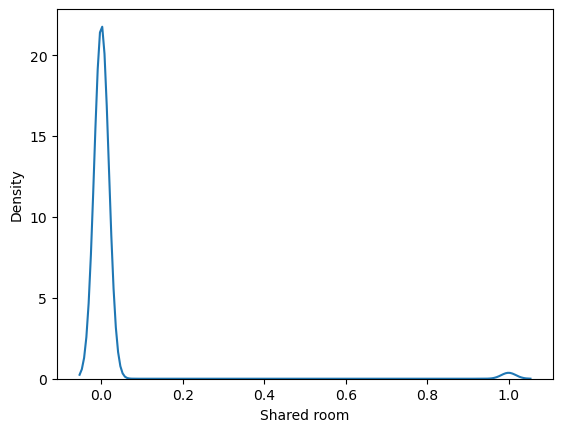

In [29]:
for i in df.columns:
    
    print(i)
    sns.kdeplot(df[i])
    plt.show()

In [30]:
X = df.drop("price", axis = 1)
y = df[["price"]]


In [31]:
# Vamos a Normalizar o Estandarizar los datos.

# Vamos a utilizar un escalador para "X" y uno para "y".

from sklearn.preprocessing import MinMaxScaler

# Normalizacion de X
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


# Normalizacion de y
scaler_y = MinMaxScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

Train data: ((14448, 20), (14448, 1))
Test data: ((3612, 20), (3612, 1))


In [33]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [[-0.00187569 -0.00097527  0.01742993  0.03624891  0.19548832  0.06134105
  -0.07383202 -0.01003647  0.03339603 -0.00688391 -0.09446493  0.01717104
  -0.09614937 -0.03664593  0.18023761 -0.03191066 -0.03979054  0.01395641
  -0.05565371 -0.12303604]]
w_0: [0.1087264]


In [34]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[0.13513186] 	Valor real:[0.07714702]
Predicción:[0.06120776] 	Valor real:[0.02765648]
Predicción:[0.15696878] 	Valor real:[0.5705968]
Predicción:[0.16824604] 	Valor real:[0.12663755]
Predicción:[0.04586491] 	Valor real:[0.06113537]


In [35]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [37]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 0.06445792900088777
MSE:	 0.012282414241556945
R**2:	 -2.823535051254248
RAE:	 0.823314558892369
RSE:	 0.789696305276958
Adjusted R**2:	 0.2059054975340865


In [38]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
1490,0.075691,0.075703,0.0151
3221,0.101892,0.101853,0.0382
3077,0.177584,0.177717,0.0750
1221,0.058224,0.058274,0.0863
2362,0.080058,0.080164,0.1318
60,0.104803,0.104947,0.1373
1012,0.251820,0.252317,0.1977
3081,0.093159,0.092966,0.2069
1994,0.237263,0.236677,0.2471
3327,0.176128,0.175605,0.2968


In [39]:
df_pred.tail(20)

,y_test,yhat,diferencia
1075,0.004367,0.053960,1135.6732
2437,0.008734,0.114108,1206.5388
651,0.008734,0.114542,1211.5087
508,0.005822,0.076686,1217.0858
1149,0.005822,0.080814,1287.9840
3098,0.005822,0.083866,1340.3999
171,0.005822,0.089080,1429.9409
250,0.007278,0.116016,1494.0640
1138,0.002911,0.048434,1563.7064
3020,0.007278,0.123190,1592.6359


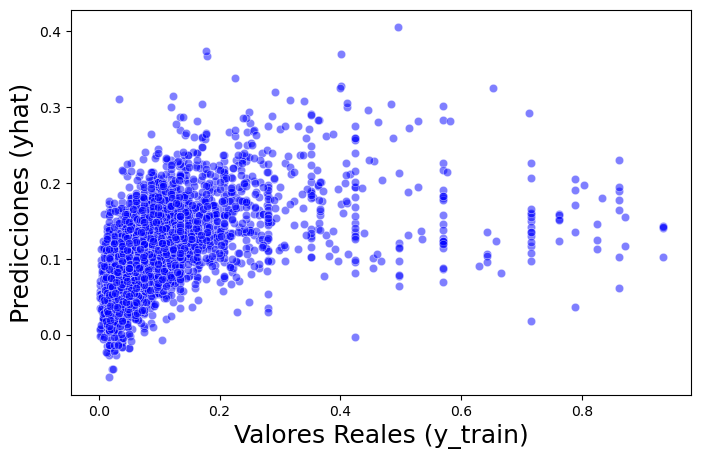

In [40]:
# Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (y_train)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

In [41]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform(y_test).flatten()
df_pred["yhat"] = scaler_y.inverse_transform(yhat).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
1490,60.0,60.007858,0.0131
3221,78.0,77.973281,0.0343
3077,130.0,130.091499,0.0704
1221,48.0,48.034526,0.0719
2362,63.0,63.072463,0.1150
60,80.0,80.098839,0.1235
3081,72.0,71.867588,0.1839
1012,181.0,181.342063,0.1890
1994,171.0,170.597153,0.2356
636,60.0,60.155905,0.2598


In [42]:
df_pred.tail(20)

,y_test,yhat,diferencia
2008,21.0,118.564959,464.5950
1576,18.0,101.996151,466.6453
1499,14.0,79.416485,467.2606
171,12.0,69.197635,476.6470
74,20.0,115.657690,478.2884
1356,20.0,116.371063,481.8553
1945,18.0,105.273037,484.8502
1073,20.0,119.669798,498.3490
3332,15.0,91.330989,508.8733
2437,14.0,86.392325,517.0880


In [54]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:20], y_test[:20]):
    print(f"Predicción: {i[0]} \tValor real: {j[0]}")

Predicción: 0.13513185756422677 	Valor real: 0.07714701601164484
Predicción: 0.06120775596526219 	Valor real: 0.027656477438136828
Predicción: 0.15696877523577984 	Valor real: 0.5705967976710336
Predicción: 0.16824604366329604 	Valor real: 0.12663755458515286
Predicción: 0.045864913589067885 	Valor real: 0.061135371179039305
Predicción: 0.2079267660965273 	Valor real: 0.21979621542940322
Predicción: 0.0767282774584343 	Valor real: 0.05385735080058224
Predicción: 0.06832216924812115 	Valor real: 0.017467248908296946
Predicción: 0.10226355101427305 	Valor real: 0.10480349344978167
Predicción: 0.06659299242178016 	Valor real: 0.03056768558951965
Predicción: 0.05518013449398598 	Valor real: 0.018922852983988356
Predicción: 0.08681959776072123 	Valor real: 0.0975254730713246
Predicción: 0.12056782057072896 	Valor real: 0.11790393013100438
Predicción: 0.1625690261071134 	Valor real: 0.046579330422125184
Predicción: 0.06209110350376019 	Valor real: 0.04366812227074236
Predicción: 0.0973821857

# Mapa

In [44]:
# df.columns

In [45]:
# df['neighbourhood_group_cleansed'].unique()

In [46]:
# with open("neighbourhoods.geojson", "r") as file:
    
#     geojson = file.read()
    
# pprint(geojson)

In [47]:
# df_map = df.groupby('neighbourhood_group_cleansed', as_index=False).mean()
# df_map

In [48]:
# df_map = df_map[df_map["price"]<200]

In [49]:
# df_map

In [50]:
# sns.histplot(df_map["price"])

In [51]:
# world_map = folium.Map(location = [40.18893909782826, -3.938873736090105], zoom_start =12)

# folium.Choropleth(geo_data     = geojson,
#                   data         = df_map,
#                   columns      = ["neighbourhood_group_cleansed", "price"],
#                   key_on       = "feature.properties.neighbourhood_group",
#                   fill_color   = "Blues_r", 
#                   fill_opacity = 0.7, 
#                   line_opacity = 0.2,
#                   legend_name  = "Precio airbnb",
#                   bins         = 253,
#                   highlight    = True).add_to(world_map)

# world_map

In [67]:
df_class = df["price"].copy()

In [68]:
df.drop("price", axis = 1, inplace = True)

In [69]:
X = np.asarray(df)
y = np.asarray(df_class)

In [70]:
X.shape, y.shape

((18060, 20), (18060,))

Feature ranking:
1. feature 12 (0.121324): host_is_superhost
2. feature 10 (0.103400): neighbourhood_cleansed
3. feature 1 (0.098221): neighbourhood_group_cleansed
4. feature 13 (0.095496): property_type
5. feature 9 (0.086211): accommodates
6. feature 6 (0.077766): beds
7. feature 2 (0.073981): minimum_nights
8. feature 8 (0.061819): maximum_nights
9. feature 7 (0.060406): availability_30
10. feature 4 (0.053404): availability_365
11. feature 5 (0.053250): number_of_reviews
12. feature 14 (0.040175): instant_bookable
13. feature 3 (0.035375): amenities
14. feature 0 (0.013660): host_verifications
15. feature 11 (0.013536): num_of_baths
16. feature 18 (0.003839): shared_bath
17. feature 15 (0.003691): unknoun_bath
18. feature 16 (0.003215): Hotel room
19. feature 19 (0.000648): Private room
20. feature 17 (0.000582): Shared room


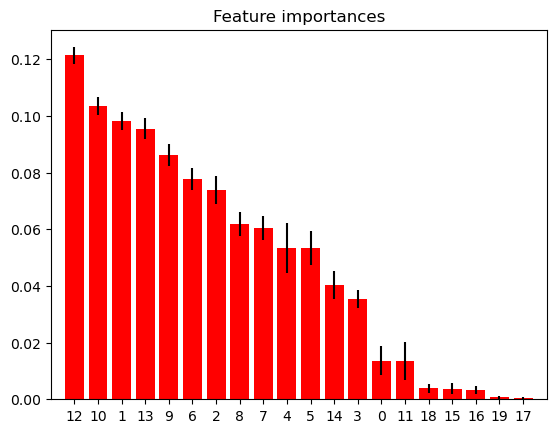

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250,
                              random_state = 0)

forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.columns[f]))

# Plot the feature importances of the forest
plt.figure()

plt.title("Feature importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()